# IMPORT LIBRARIES

In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import other libraries if needed

# 1. EDA

In [600]:
train = pd.read_csv("./train.csv")
train.head()

,CustomerID,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,1,41.805313,-122.946953,Female,No,Yes,No,17,Yes,No,...,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.687896,1845.463646,Yes,5159.662242
1,2,37.557421,-121.662183,Female,No,No,No,6,Yes,No,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.809145,137.340359,No,5555.255006
2,3,33.926801,-118.337288,Male,No,Yes,Yes,72,Yes,Yes,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.672564,2033.267100,No,6426.081258
3,4,33.842400,-117.522049,Male,No,No,No,11,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.551155,236.568970,No,5431.894188
4,5,33.659241,-116.560957,Female,No,No,No,56,Yes,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.614627,6505.861021,No,4210.224835


In [601]:
train.columns

Index(['CustomerID', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'CLTV'],
      dtype='object')

In [602]:
print("Size of the data:", train.shape)

Size of the data: (5634, 24)


In [603]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5634 non-null   int64  
 1   Latitude           5634 non-null   float64
 2   Longitude          5634 non-null   float64
 3   Gender             5634 non-null   object 
 4   Senior Citizen     5634 non-null   object 
 5   Partner            5634 non-null   object 
 6   Dependents         5634 non-null   object 
 7   Tenure Months      5634 non-null   int64  
 8   Phone Service      5634 non-null   object 
 9   Multiple Lines     5634 non-null   object 
 10  Internet Service   5634 non-null   object 
 11  Online Security    5634 non-null   object 
 12  Online Backup      5634 non-null   object 
 13  Device Protection  5634 non-null   object 
 14  Tech Support       5634 non-null   object 
 15  Streaming TV       5634 non-null   object 
 16  Streaming Movies   5634 

In [604]:
train.nunique()

CustomerID           5634
Latitude             5634
Longitude            5634
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      5634
Total Charges        5626
Churn Label             2
CLTV                 5634
dtype: int64

In [605]:
# descriptive statistics for numerical columns
train.describe()

,CustomerID,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,2817.500000,36.269710,-119.783700,32.396166,64.725332,2504.289916,4405.419906
std,1626.540039,2.461827,2.149481,24.618646,30.189317,2491.276471,1188.118436
min,1.000000,32.556115,-124.305928,0.000000,18.235191,0.000000,2001.007650
25%,1409.250000,34.030504,-121.786468,9.000000,35.317744,437.904744,3463.916945
50%,2817.500000,36.300459,-119.688426,29.000000,70.249691,1536.578453,4537.259130
75%,4225.750000,38.209293,-118.046674,56.000000,89.938891,4154.543414,5386.183285
max,5634.000000,41.967365,-114.184825,72.000000,118.612904,9353.780727,6500.684263


In [606]:
# descriptive statistics for categorical columns
train.describe(include="object")

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,2848,4722,2924,4349,5103,2720,2481,2803,2466,2442,2792,2250,2222,3108,3349,1902,4139


In [607]:
train.isnull().sum()

CustomerID           0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
CLTV                 0
dtype: int64

In [608]:
train["Internet Service"].value_counts()

Fiber optic    2481
DSL            1920
No             1233
Name: Internet Service, dtype: int64

In [609]:
# Check for outliers with boxplots
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_grid(dataframe, n_cols=3, subplot_size=(5, 3)):
    """
    Plots a grid of boxplots for all numerical non-binary columns in a DataFrame.

    :param dataframe: pandas DataFrame to plot.
    :param n_cols: Number of columns in the grid.
    :param subplot_size: Size of each subplot (width, height).
    """
    # Identify numerical columns that are not binary (more than 2 unique values)
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object' and dataframe[col].nunique() > 2]

    # Determine the grid size (number of rows and columns in the grid)
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Computes the required number of rows

    # Create a figure with subplots in a grid
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each column
        sns.boxplot(y=dataframe[col])
        plt.title(col)
    plt.tight_layout()  # Adjusts the subplots to fit in the figure area
    plt.show()


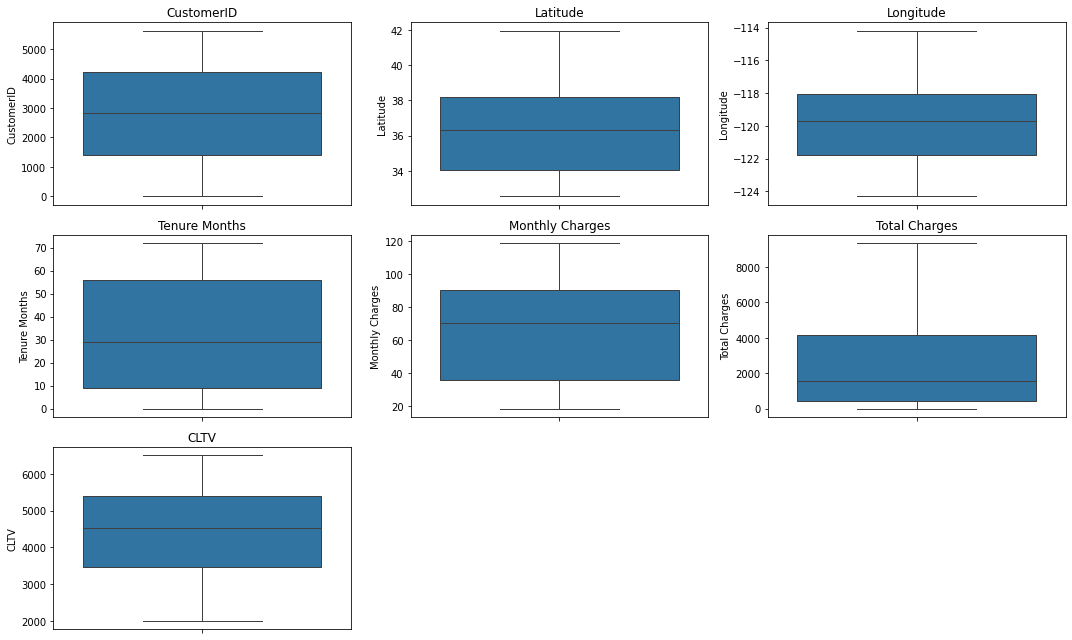

In [610]:
plot_boxplots_grid(train)

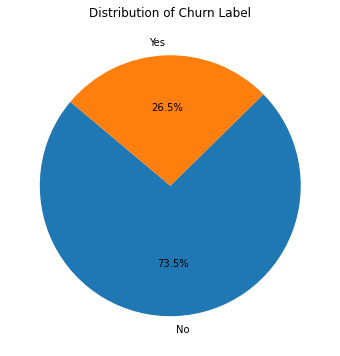

In [611]:
# Plot the distribution for target column
import matplotlib.pyplot as plt

def plot_churn_distribution(data, column='Churn Label'):
    """
    Plots the distribution of the churn label in a pie chart.

    :param data: DataFrame containing the customer data.
    :param column: Name of the column containing the churn label.
    """
    # Calculating the distribution
    churn_dist = data[column].value_counts()

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.pie(churn_dist, labels=churn_dist.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Churn Label')
    plt.show()

# Testing the function with the customer data
plot_churn_distribution(train)

In [612]:
# Plot the distribution for each numerical columns based on the churn label

import seaborn as sns

def plot_numerical_distribution_by_churn(data, churn_column='Churn Label'):
    """
    Plots the distribution of each numerical column in the data, separated by churn label.

    :param data: DataFrame containing the customer data.
    :param churn_column: Name of the column containing the churn label.
    """
    # Identifying numerical columns
    numerical_columns = data.select_dtypes(include=['number']).columns

    # Number of rows and columns for the subplot
    n_cols = 2
    n_rows = (len(numerical_columns) + 1) // n_cols

    # Creating subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    # Plotting each numerical column
    for i, col in enumerate(numerical_columns):
        sns.histplot(data=data, x=col, hue=churn_column, ax=axes[i], kde=True, element='step')
        axes[i].set_title(f'Distribution of {col} by Churn Label')
        axes[i].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()
    plt.show()

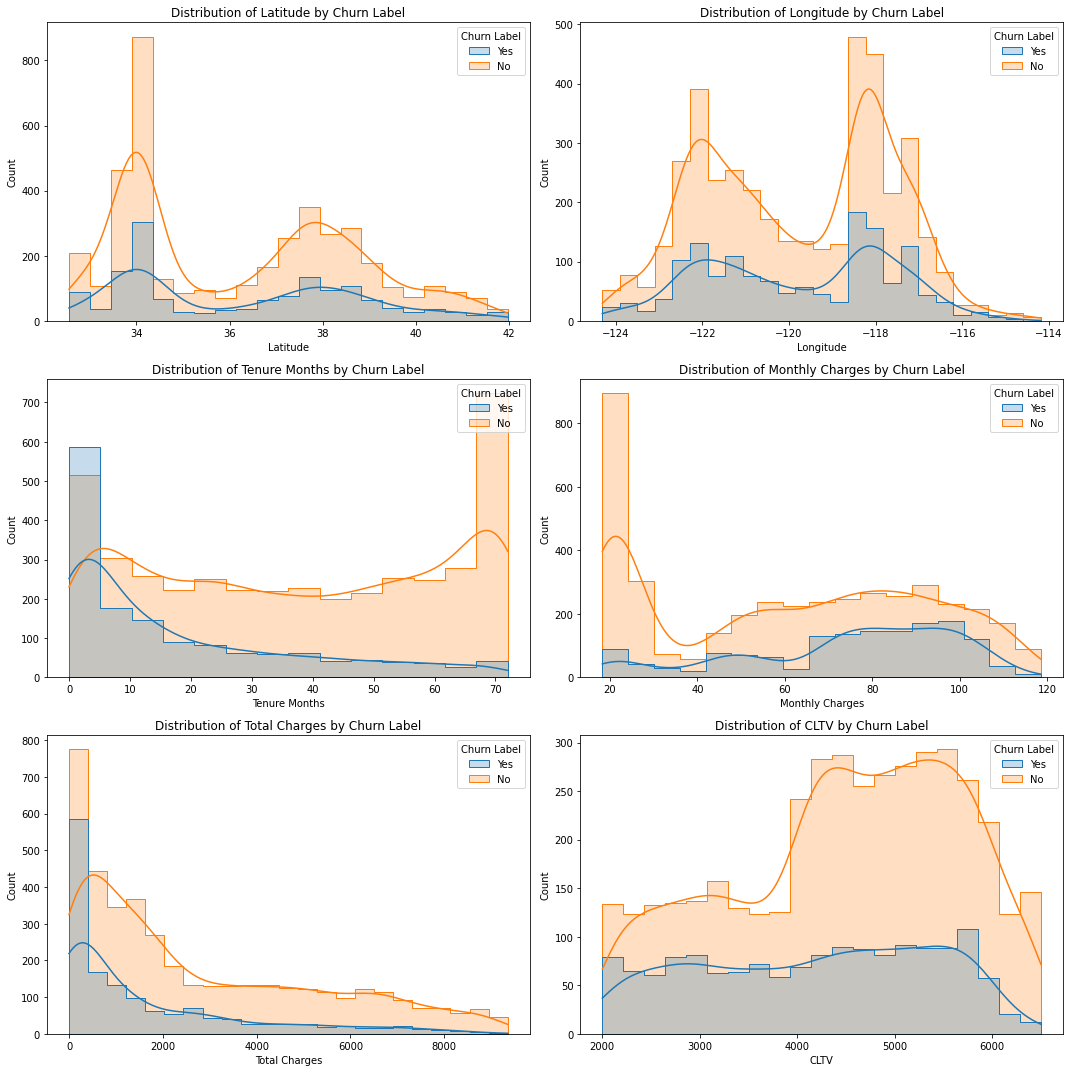

In [613]:
plot_numerical_distribution_by_churn(train[['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Churn Label']])

In [614]:
# Plot geospatial data

import cartopy.crs as ccrs
import cartopy.feature as cf

def plot_latitude_longitude_with_map(df):
    """
    Create a scatter plot of the latitude and longitude of each observation, with a world map as the background.

    :param df: The DataFrame to generate the chart for.
    """

    # Create a new figure with a PlateCarree projection
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Add the coastlines and countries to the map
    ax.coastlines()
    ax.add_feature(cf.BORDERS, linestyle='-', alpha=0.5)

    # Plot the longitude and latitude of each observation on the map
    ax.scatter(df["Longitude"].values, df["Latitude"].values, s=5, alpha=0.25, transform=ccrs.PlateCarree())

    # Set the chart title
    plt.title("Observation Locations")

    # Display the chart
    plt.show()

In [615]:
# plot_latitude_longitude_with_map(train)

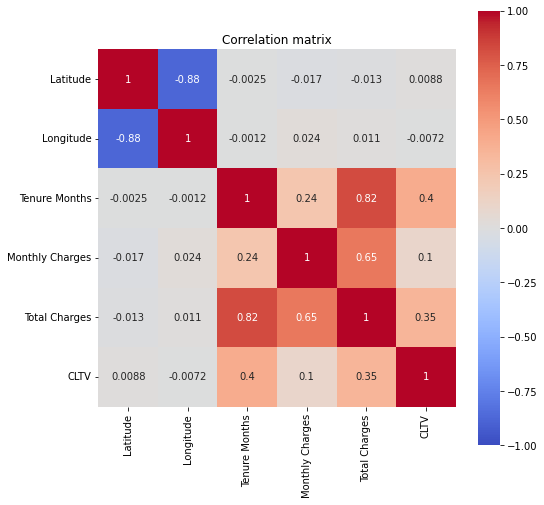

In [616]:
# Plot correlation matrix
# REVISI SESUAI KEBUTUHAN
corr = train.drop('CustomerID', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

# Train set splitting

In [617]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(train, test_size=0.2, random_state=42)

In [618]:
train_set.shape, val_set.shape

((4507, 24), (1127, 24))

# DATA CLEANING & PREPROCESSING

In [619]:
from sklearn.base import BaseEstimator, TransformerMixin

## DATA CLEANING

### Dropping columns

Columns which is unique for every row will not provide useful information to the model, these columns are: CustomerID, Latitude, Longitude, Monthly Charges, and CLTV.

In [620]:
columns_to_drop = ['CustomerID', 'Latitude', 'Longitude', 'Monthly Charges', 'CLTV']
# we keep total charges because it is highly correlated with tenure months

train_set.drop(columns=columns_to_drop, inplace=True)
val_set.drop(columns=columns_to_drop, inplace=True)

train_set.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label
4082,Male,No,No,No,8,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),221.947873,No
1728,Female,No,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),251.806446,No
2795,Female,No,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),7863.728271,No
334,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),1590.745409,No
3625,Male,No,Yes,No,50,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),5192.545868,No


### Handling missing data

No missing data so we dont need to do anything.

### Feature Engineering

In [621]:
train_set.shape

(4507, 19)

## DATA PREPROCESSING

### FEATURE SCALING

In [622]:
# Import necessary scalers
from sklearn.preprocessing import StandardScaler

class FeatureScaler(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        
        # Fit the scaler here

        self.numerical_cols = [col for col in X.columns if X[col].dtype != 'object' and X[col].nunique() > 2]
        self.sc = StandardScaler().fit(X[self.numerical_cols])
        
        return self
    
    def transform(self, X):
        
        # Perform scaling here

        X[self.numerical_cols] = self.sc.transform(X[self.numerical_cols])
        
        return X

### FEATURE ENCODING

In [623]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        
        # Encode the categorical variables here
        
        cat_cols = X.select_dtypes(include=['object'])
        
        for col in cat_cols:
            
            # Check if the column is binary
            if X[col].nunique() == 2 and col != 'Gender':
                
                # Map the column with a dictionary
                X_encoded[col] = X_encoded[col].map({'Yes': 1, 'No': 0})
                
            else:
                # Perform one-hot encoding
                X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[col], prefix=col)], axis=1)

                # Drop original categorical columns from DataFrame
                X_encoded.drop(col, axis=1, inplace=True)
        
        return X_encoded

## COMPILE PIPELINE

In [624]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", FeatureScaler()),
                 ("encoder", FeatureEncoder())])

In [625]:
# Your code should work up until this point
train_set = pipe.fit_transform(train_set)
val_set = pipe.transform(val_set)

In [626]:
train_set

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Total Charges,Churn Label,Gender_Female,Gender_Male,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
4082,0,0,0,-0.980753,0,1,-0.910263,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1728,0,1,1,-0.858517,1,0,-0.898222,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2795,0,1,1,1.423219,1,0,2.171304,0,1,0,...,0,0,1,0,0,1,0,1,0,0
334,0,0,0,1.626946,1,0,-0.358292,0,1,0,...,0,1,0,0,0,1,0,1,0,0
3625,0,1,0,0.730549,1,1,1.094143,0,0,1,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,0,-0.125102,1,1,-0.046516,0,1,0,...,1,0,0,1,0,0,0,0,1,0
5191,0,1,1,0.241606,1,1,0.599276,0,0,1,...,1,0,0,0,0,1,1,0,0,0
5226,0,1,0,1.138002,1,0,-0.467408,0,0,1,...,0,1,0,0,0,1,0,0,0,1
5390,0,0,0,0.200861,1,0,0.065256,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [627]:
from sklearn.feature_selection import mutual_info_classif

In [628]:
y_train = train_set["Churn Label"]
X_train = train_set.drop("Churn Label", axis=1)

In [629]:
# Lets perform feature selection using mutual information
importances = mutual_info_classif(X_train, y_train)
feat_importances = pd.Series(importances, train_set.columns[0:len(train_set.columns)-1])
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.head(30)

Streaming Movies_Yes                        0.088186
Tenure Months                               0.069861
Contract_One year                           0.068990
Device Protection_Yes                       0.061799
Internet Service_No                         0.057059
Internet Service_DSL                        0.056368
Payment Method_Credit card (automatic)      0.049000
Total Charges                               0.045886
Internet Service_Fiber optic                0.043386
Online Backup_No                            0.041763
Dependents                                  0.038103
Online Security_Yes                         0.035740
Online Backup_Yes                           0.035332
Tech Support_No                             0.035075
Online Security_No                          0.031323
Device Protection_No                        0.027901
Streaming TV_No                             0.026461
Streaming Movies_No                         0.023630
Paperless Billing                           0.

<Axes: >

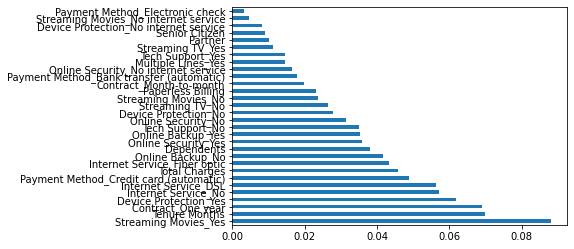

In [630]:
feat_importances.head(30).plot(kind="barh")

In [631]:
desired_feats = feat_importances.head(30).index.tolist()

<Axes: >

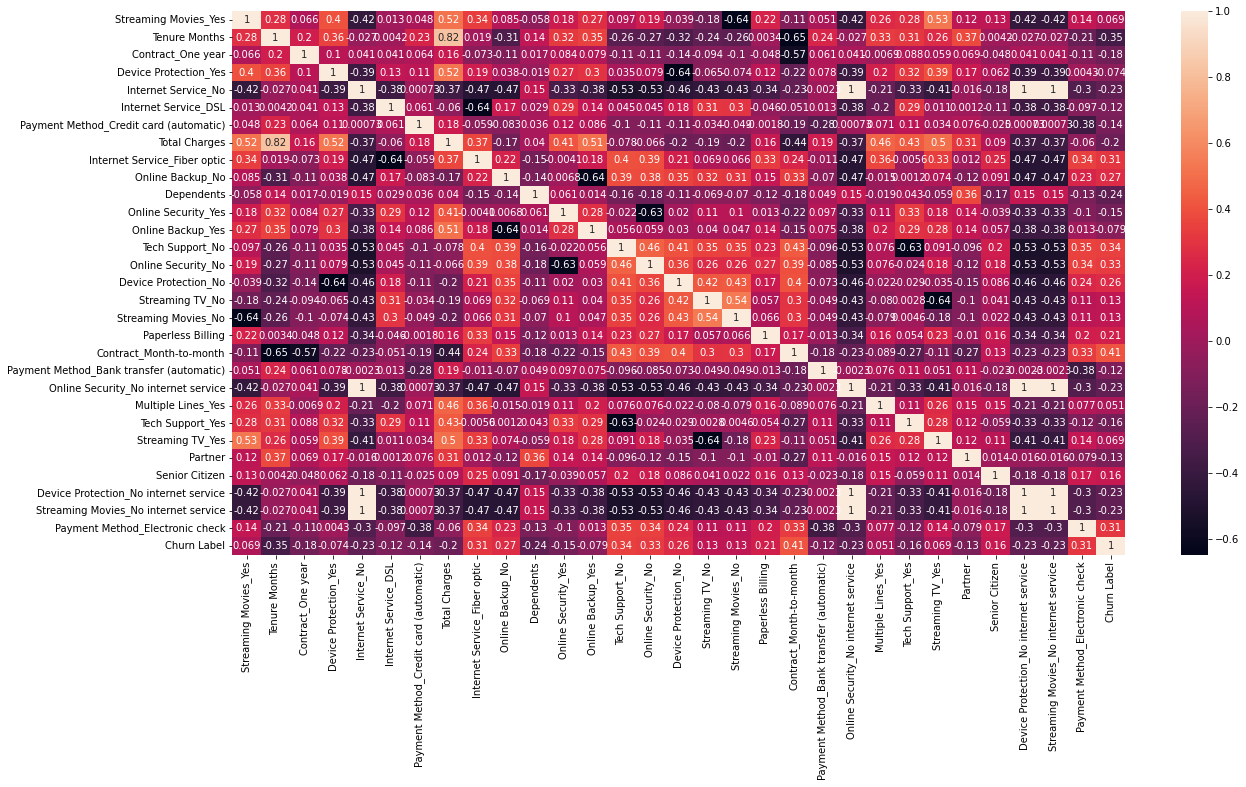

In [632]:
corr = train_set[desired_feats+["Churn Label"]].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True)

In [633]:
corr["Churn Label"].sort_values(ascending=False)

Churn Label                                 1.000000
Contract_Month-to-month                     0.407915
Tech Support_No                             0.336928
Online Security_No                          0.329678
Payment Method_Electronic check             0.310551
Internet Service_Fiber optic                0.307418
Online Backup_No                            0.267320
Device Protection_No                        0.263941
Paperless Billing                           0.205012
Senior Citizen                              0.159018
Streaming TV_No                             0.126330
Streaming Movies_No                         0.126143
Streaming Movies_Yes                        0.069064
Streaming TV_Yes                            0.068773
Multiple Lines_Yes                          0.051374
Device Protection_Yes                      -0.074347
Online Backup_Yes                          -0.078885
Payment Method_Bank transfer (automatic)   -0.116410
Internet Service_DSL                       -0.